## 🚀 Exercise 8: More on sampling Distributions & the Central Limit Theorem (CLT) 
We will use **real-world data** from the **California Housing** dataset (1990 U.S. Census block groups).

## Data context (real-world meaning)
Each row is a California census block group (1990). A few variables we’ll use:

- `MedInc`: median income (in tens of thousands of dollars)
- `HouseAge`: median house age
- `AveRooms`: average number of rooms
- `AveOccup`: average household occupancy
- `MedHouseVal`: median house value (in hundreds of thousands of dollars)

**In the tasks, we'll treat the full dataset as a large "population" and study what happens when we take smaller samples—like a survey or a study would.**


**What you'll learn**
- What a *sampling distribution* is
- How sample size changes variability (standard error)
- Why the CLT is useful (and when it can be slow)
- How normal approximations connect to confidence intervals and decision-making


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import fetch_california_housing

In [41]:
# Set random seed for reproducibility
RSEED = 42

In [1]:
# Load real-world dataset
cal = fetch_california_housing(as_frame=True)
df = cal.frame.copy()

df.head(), df.shape

(   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 
    Longitude  MedHouseVal  
 0    -122.23        4.526  
 1    -122.22        3.585  
 2    -122.24        3.521  
 3    -122.25        3.413  
 4    -122.25        3.422  ,
 (20640, 9))

#### ✅ Task for students: 
Keep only the variables we need in the dataframe and reset the index ["MedInc", "HouseAge", "AveRooms", "AveOccup", "MedHouseVal"]

In [11]:
cols = ["MedInc", "HouseAge", "AveRooms", "AveOccup", "MedHouseVal"]
df = df[cols].dropna().reset_index(drop=True)

In [12]:
# Print =quick summaries
summary = df.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


### ✅ Task for students: Visualizing a "population" distribution

We will assume the data represents xqa population and we will say how would sampling play out.

Before sampling, vizualize the distribution of a real variable of population: **median house value** (`MedHouseVal`).

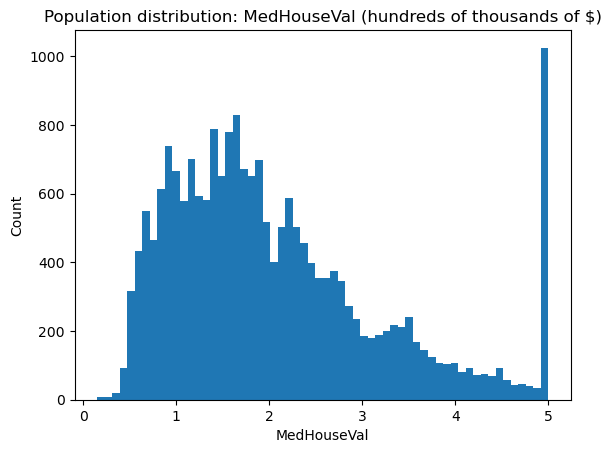

In [15]:
x = df["MedHouseVal"].to_numpy()

plt.figure()
plt.hist(x, bins=60)
plt.title("Population distribution: MedHouseVal (hundreds of thousands of $)")
plt.xlabel("MedHouseVal")
plt.ylabel("Count")
plt.show()

#### ✅ Task for students: 
Desrcibe the shape of the distribution, is it normal? compute the Skewness as a quick diagnostic.

In [14]:
stats.skew(x)
# the data is not a normaly distributed and rather a right skewed

np.float64(0.9776922140978419)

#### ✅ Task for students: Sampling distribution of the mean (real-world: estimating average house value)

**Scenario:** A city analyst wants to estimate the *average* median house value across California block groups.  
They can only sample **n**  groups (budget constraint).

**Student task**
1. For each sample size `n in {5, 30, 100}`, draw many random samples each with sample with 1000 repititions from `MedHouseVal` (with replacement). Use np.random.choice for this purpose.
3. Compute the **sample mean** for each draw of the sample means.
4. Plot the sampling distribution of the mean for each `n`.
5. Compare how the spread changes as `n` increases.

Use np.std(ddof=1) or pd.Series(m).std() to compute standard deviation and answer:

- How does variability of the sample mean change with `n`?  
- Does the shape become more “normal” with larger `n`?


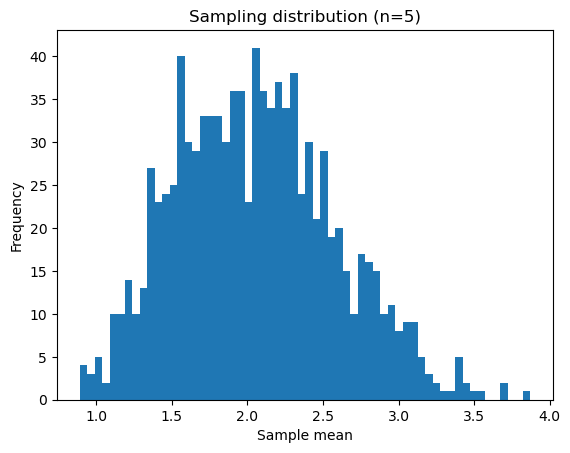

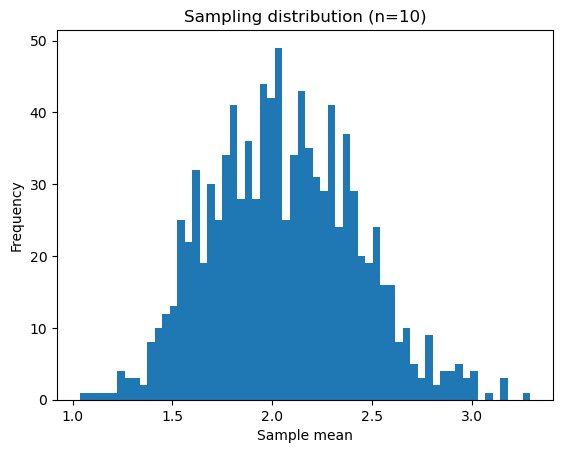

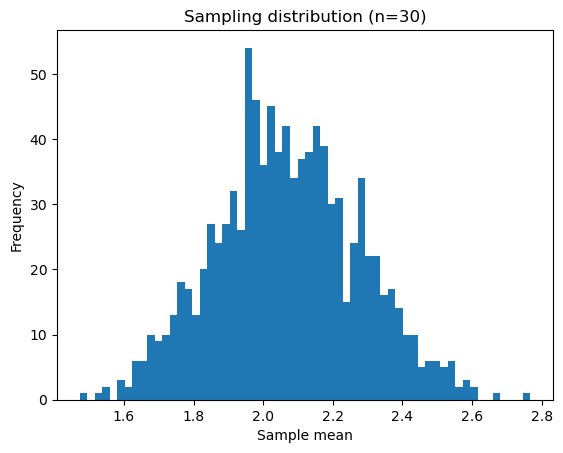

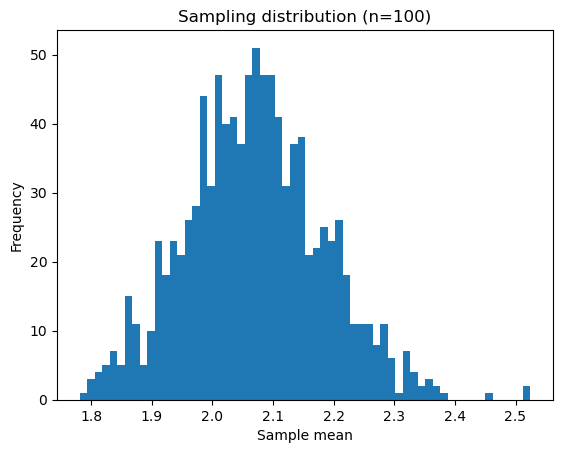

5      2.056014
10     2.058697
30     2.070283
100    2.069744
Name: Empirical Mean, dtype: float64
5      0.526708
10     0.367825
30     0.206509
100    0.113153
Name: Empirical SD, dtype: float64


In [75]:
# the following function should return array of sample means of shape (reptitions,)
def sample_means(data, n, reps=1000, seed=RSEED):
    # Your code here
    np.random.seed(RSEED)
    sample_means = np.random.choice(data, size=(reps, n), replace=True).mean(axis=1)
    return sample_means
     

data = df["MedHouseVal"].to_numpy()
ns = [5, 10, 30, 100]

mean_values = {n: sample_means(data, n) for n in ns}

for n, m in mean_values.items():
    plt.hist(m, bins=60)
    plt.title(f"Sampling distribution (n={n})")
    plt.xlabel("Sample mean")
    plt.ylabel("Frequency")
    plt.show()

# Find and print the mean value of sample means for each n and empirical standard deviation
print(pd.Series({n: m.mean() for n, m in mean_values.items()}, name="Empirical Mean"))
print(pd.Series({n: m.std() for n, m in mean_values.items()}, name="Empirical SD"))

#### ✅ Task for students: complete this  conclusion:
- The larger n the closer the sample mean distribution get to the symmetric shape of normal distribution with mean value ~ mean value of the original population 

#### ✅ Task for students: Standard error: connect simulation to the formula (real-world: “typical estimation error”)

**Scenario:** You report an average house value from a sample, but decision-makers ask: “How much could this estimate vary if we repeated the survey?”

**Student task**
1. Compute the **population standard deviation** of `MedHouseVal` from the full dataset (treat as population).
2. For `n = 30, 100, 400`, compare:
   - simulated SD of the sample mean (from Task 1 style simulation) with 1000 repititions
   - theoretical approximation:  $ \text{SE}(\bar X) \approx \sigma / \sqrt{n}$
3. Summarize the results in a small table.

**What to look for**
- Does simulated SD match $\sigma/\sqrt{n}$
- Why does this matter for planning sample sizes?

In [76]:
sigma = np.std(data)  # treat full dataset as population
print("The population standard deviation:", sigma)

ns2 = [5, 30, 100, 400]
reps = 1000

rows = []
for n in ns2:
    m = sampling_distribution_of_mean(data, n, reps=reps, seed=RSEED)
    sim_se = np.std(m)
    theo_se = sigma / np.sqrt(n)
    rows.append({"n": n, "simulated_SE": sim_se, "theoretical_sigma/sqrt(n)": theo_se})

pd.DataFrame(rows)

The population standard deviation: 1.1539282040412253


,n,simulated_SE,theoretical_sigma/sqrt(n)
0,5,0.515519,0.516052
1,30,0.209908,0.210678
2,100,0.118157,0.115393
3,400,0.059067,0.057696


#### ✅ Task for students: add a Conclusion
The CLT holds for all tested values of ( n ), with the sample standard deviation close to the theoretical standard error
$ \text{SE}(\bar X) \approx \sigma / \sqrt{n}$
As ( n ) increases, the standard error decreases, so the distribution becomes narrower around the mean, indicating greater certainty in the expected value (sample mean)


#### ✅ Task for students: Sampling distribution of a proportion (real-world: “How common are expensive areas?”)

**Scenario:** A housing policy team asks:  
> “What fraction of block groups have median house value above $300k?”

In the dataset, `MedHouseVal` is in *hundreds of thousands*, so $300k corresponds to `MedHouseVal > 3.0`.

**Student task**
1. Compute the “population” proportion \(p\) using all rows.
2. For `n = 10`, `n = 30`,  and `n = 400`, simulate the sampling distribution of $(\hat p)$ (sample proportion).
3. Compare the shape to a normal approximation:
  $ \hat p \approx \mathcal{N}(p,\; p(1-p)/n) $
4. Interpret results: when does the normal approximation look reasonable?


The mean MedHouseVal from the Population: 0.18585271317829458


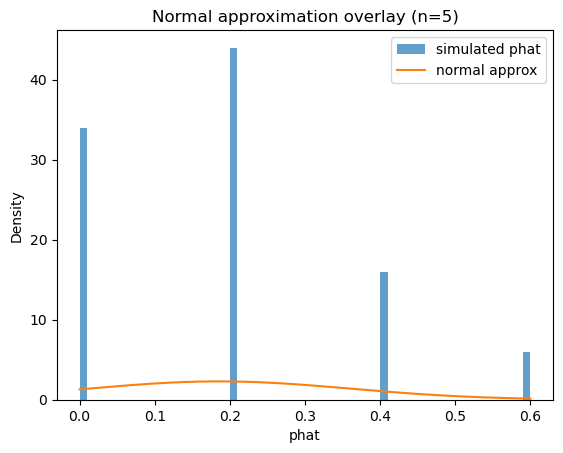

n=5: mean=0.1880, SD=0.1725, approx=0.1740


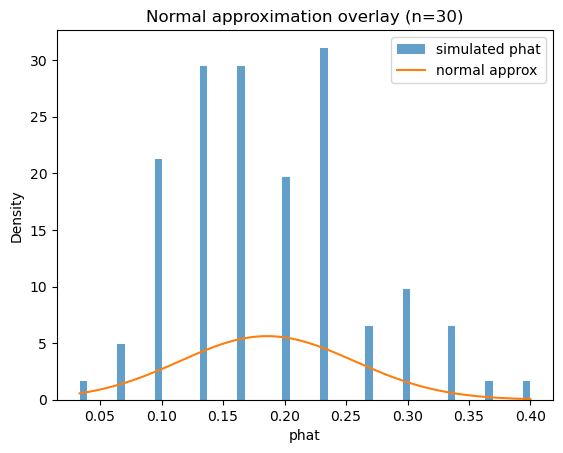

n=30: mean=0.1873, SD=0.0734, approx=0.0710


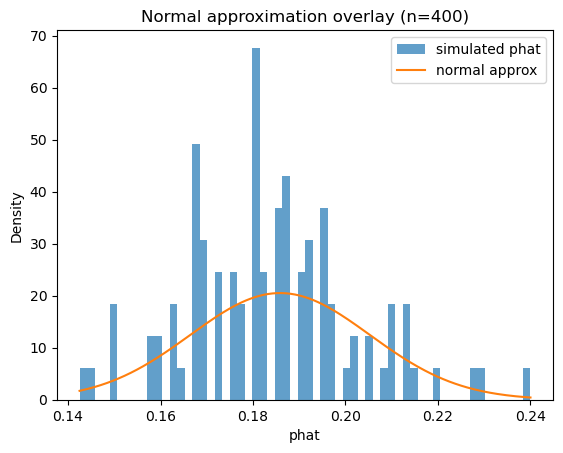

n=400: mean=0.1838, SD=0.0184, approx=0.0194


In [74]:
y = (df["MedHouseVal"].to_numpy() > 3.0).astype(int)
p = y.mean() # we can imagine this as if it is for hte whole population
print("The mean MedHouseVal from the Population:", p)

def sample_means(data, n, reps=100, seed=RSEED):
    # Your code here
    np.random.seed(RSEED)
    sample_means = np.random.choice(data, size=(reps, n), replace=True).mean(axis=1)
    return sample_means

for n in [5, 30, 400]:
    phat = sample_means(y, n, reps=1000)


    # overlay normal curve on histogram
    mu = p
    sd = np.sqrt(p * (1 - p) / n)
    xs = np.linspace(phat.min(), phat.max(), 300)

    plt.hist(phat, bins=60, density=True, alpha=0.7, label="simulated phat")
    plt.plot(xs, stats.norm.pdf(xs, mu, sd), label="normal approx")
    plt.title(f"Normal approximation overlay (n={n})")
    plt.xlabel("phat")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

    print(f"n={n}: mean={phat.mean():.4f}, SD={phat.std(ddof=1):.4f}, approx={sd:.4f}")